## Guided Project for Logistic Regression in Python

This dataset comes from the famous Cleveland Clinic Foundation, which recorded information on various patient characteristics, including age and chest pain, to try to classify the presence of heart disease in an individual. This a prime example of how machine learning can help solve problems that have a real impact on people's lives.

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [2]:
# Load in the heart disease dataset
heart = pd.read_csv("../data/heart_disease.csv")

In [3]:
heart

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,present
0,1,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,2,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,3,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,4,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,5,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,299,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
299,300,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,1
300,301,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,1
301,302,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1


## Exploring The Dataset

In [4]:
# Columns in the dataset
heart.columns
     


Index(['Unnamed: 0', 'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'present'],
      dtype='object')

In [5]:

heart.head

<bound method NDFrame.head of      Unnamed: 0  age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  \
0             1   63    1   1       145   233    1        2      150      0   
1             2   67    1   4       160   286    0        2      108      1   
2             3   67    1   4       120   229    0        2      129      1   
3             4   37    1   3       130   250    0        0      187      0   
4             5   41    0   2       130   204    0        2      172      0   
..          ...  ...  ...  ..       ...   ...  ...      ...      ...    ...   
298         299   45    1   1       110   264    0        0      132      0   
299         300   68    1   4       144   193    1        0      141      0   
300         301   57    1   4       130   131    0        0      115      1   
301         302   57    0   2       130   236    0        2      174      0   
302         303   38    1   3       138   175    0        0      173      0   

     oldpeak  slope  

array([[<AxesSubplot:title={'center':'present'}>]], dtype=object)

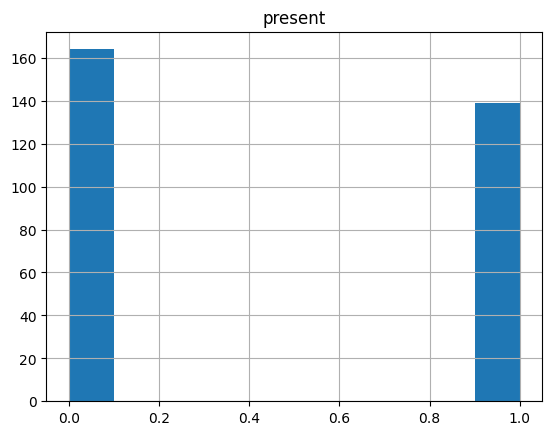

In [7]:
import matplotlib.pyplot as plt
# Checking the outcome
heart.hist("present")
     

In [11]:
# # Checking potential predictors
# heart.groupby("present").agg(
#     {
#         "age": "mean",
#         "sex": "mean",
#         "cp": "mean",
#         "trestbps": "mean",
#         "chol": "mean",
#         "fbs": "mean",
#         "restecg": "mean",
#         "thalach": "mean",
#         "exang": "mean",
#         "oldpeak": "mean",
#         "slope": "mean",
#         "ca": "mean",
#         "thal": "mean"
#     }
# )

Some columns have a small, but noticeable difference when stratified by predictors. Based on the differences and some knowledge about heart disease, these seem like good candidates for predictors:

age
thalach (maximum heart rate achieved)
restecg (resting ECG)
ca (number of vessels colored by fluoroscopy)

## Dividing The Data
We'll use a 70-30 split of the dataset for the training and test sets.

In [12]:
X = heart[["age", "thalach", "restecg", "ca"]]
y = heart["present"]

# 70% for training set, 30% for test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [16]:
# Checking for separation in the datasets
print("Y_train: ", sum(y_train == 0))
print("Y_train: ", sum(y_train == 1))
print("Y_test: ", sum(y_test == 0))
print("Y_test: ", sum(y_test == 1))

Y_train:  115
Y_train:  97
Y_test:  49
Y_test:  42


We confirm above that there are both cases and non-cases in both the training and test sets

## Build The Model

In [18]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  303 non-null    int64  
 1   age         303 non-null    int64  
 2   sex         303 non-null    int64  
 3   cp          303 non-null    int64  
 4   trestbps    303 non-null    int64  
 5   chol        303 non-null    int64  
 6   fbs         303 non-null    int64  
 7   restecg     303 non-null    int64  
 8   thalach     303 non-null    int64  
 9   exang       303 non-null    int64  
 10  oldpeak     303 non-null    float64
 11  slope       303 non-null    int64  
 12  ca          303 non-null    object 
 13  thal        303 non-null    object 
 14  present     303 non-null    int64  
dtypes: float64(1), int64(12), object(2)
memory usage: 33.2+ KB


In [19]:
heart.dtypes.value_counts()

int64      12
object      2
float64     1
dtype: int64

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,present
166,167,52,1,3,138,223,0,0,169,0,0.0,1,?,3.0,0
192,193,43,1,4,132,247,1,2,143,1,0.1,2,?,7.0,1
287,288,58,1,2,125,220,0,0,144,0,0.4,2,?,7.0,0
302,303,38,1,3,138,175,0,0,173,0,0.0,1,?,3.0,0


In [32]:
print(heart['thal'].value_counts())
print(heart['ca'].value_counts())

3.0    166
7.0    117
6.0     18
?        2
Name: thal, dtype: int64
0.0    176
1.0     65
2.0     38
3.0     20
?        4
Name: ca, dtype: int64


In [33]:
# Drop the index column to start with
heart_cleaned = heart.drop(columns=['Unnamed: 0'])

# convert to numeric and replace the unknowns with NaN
heart_cleaned['thal'] = heart_cleaned['thal'].apply((pd.to_numeric), errors='coerce')
heart_cleaned['ca'] = heart_cleaned['ca'].apply(pd.to_numeric, errors='coerce')

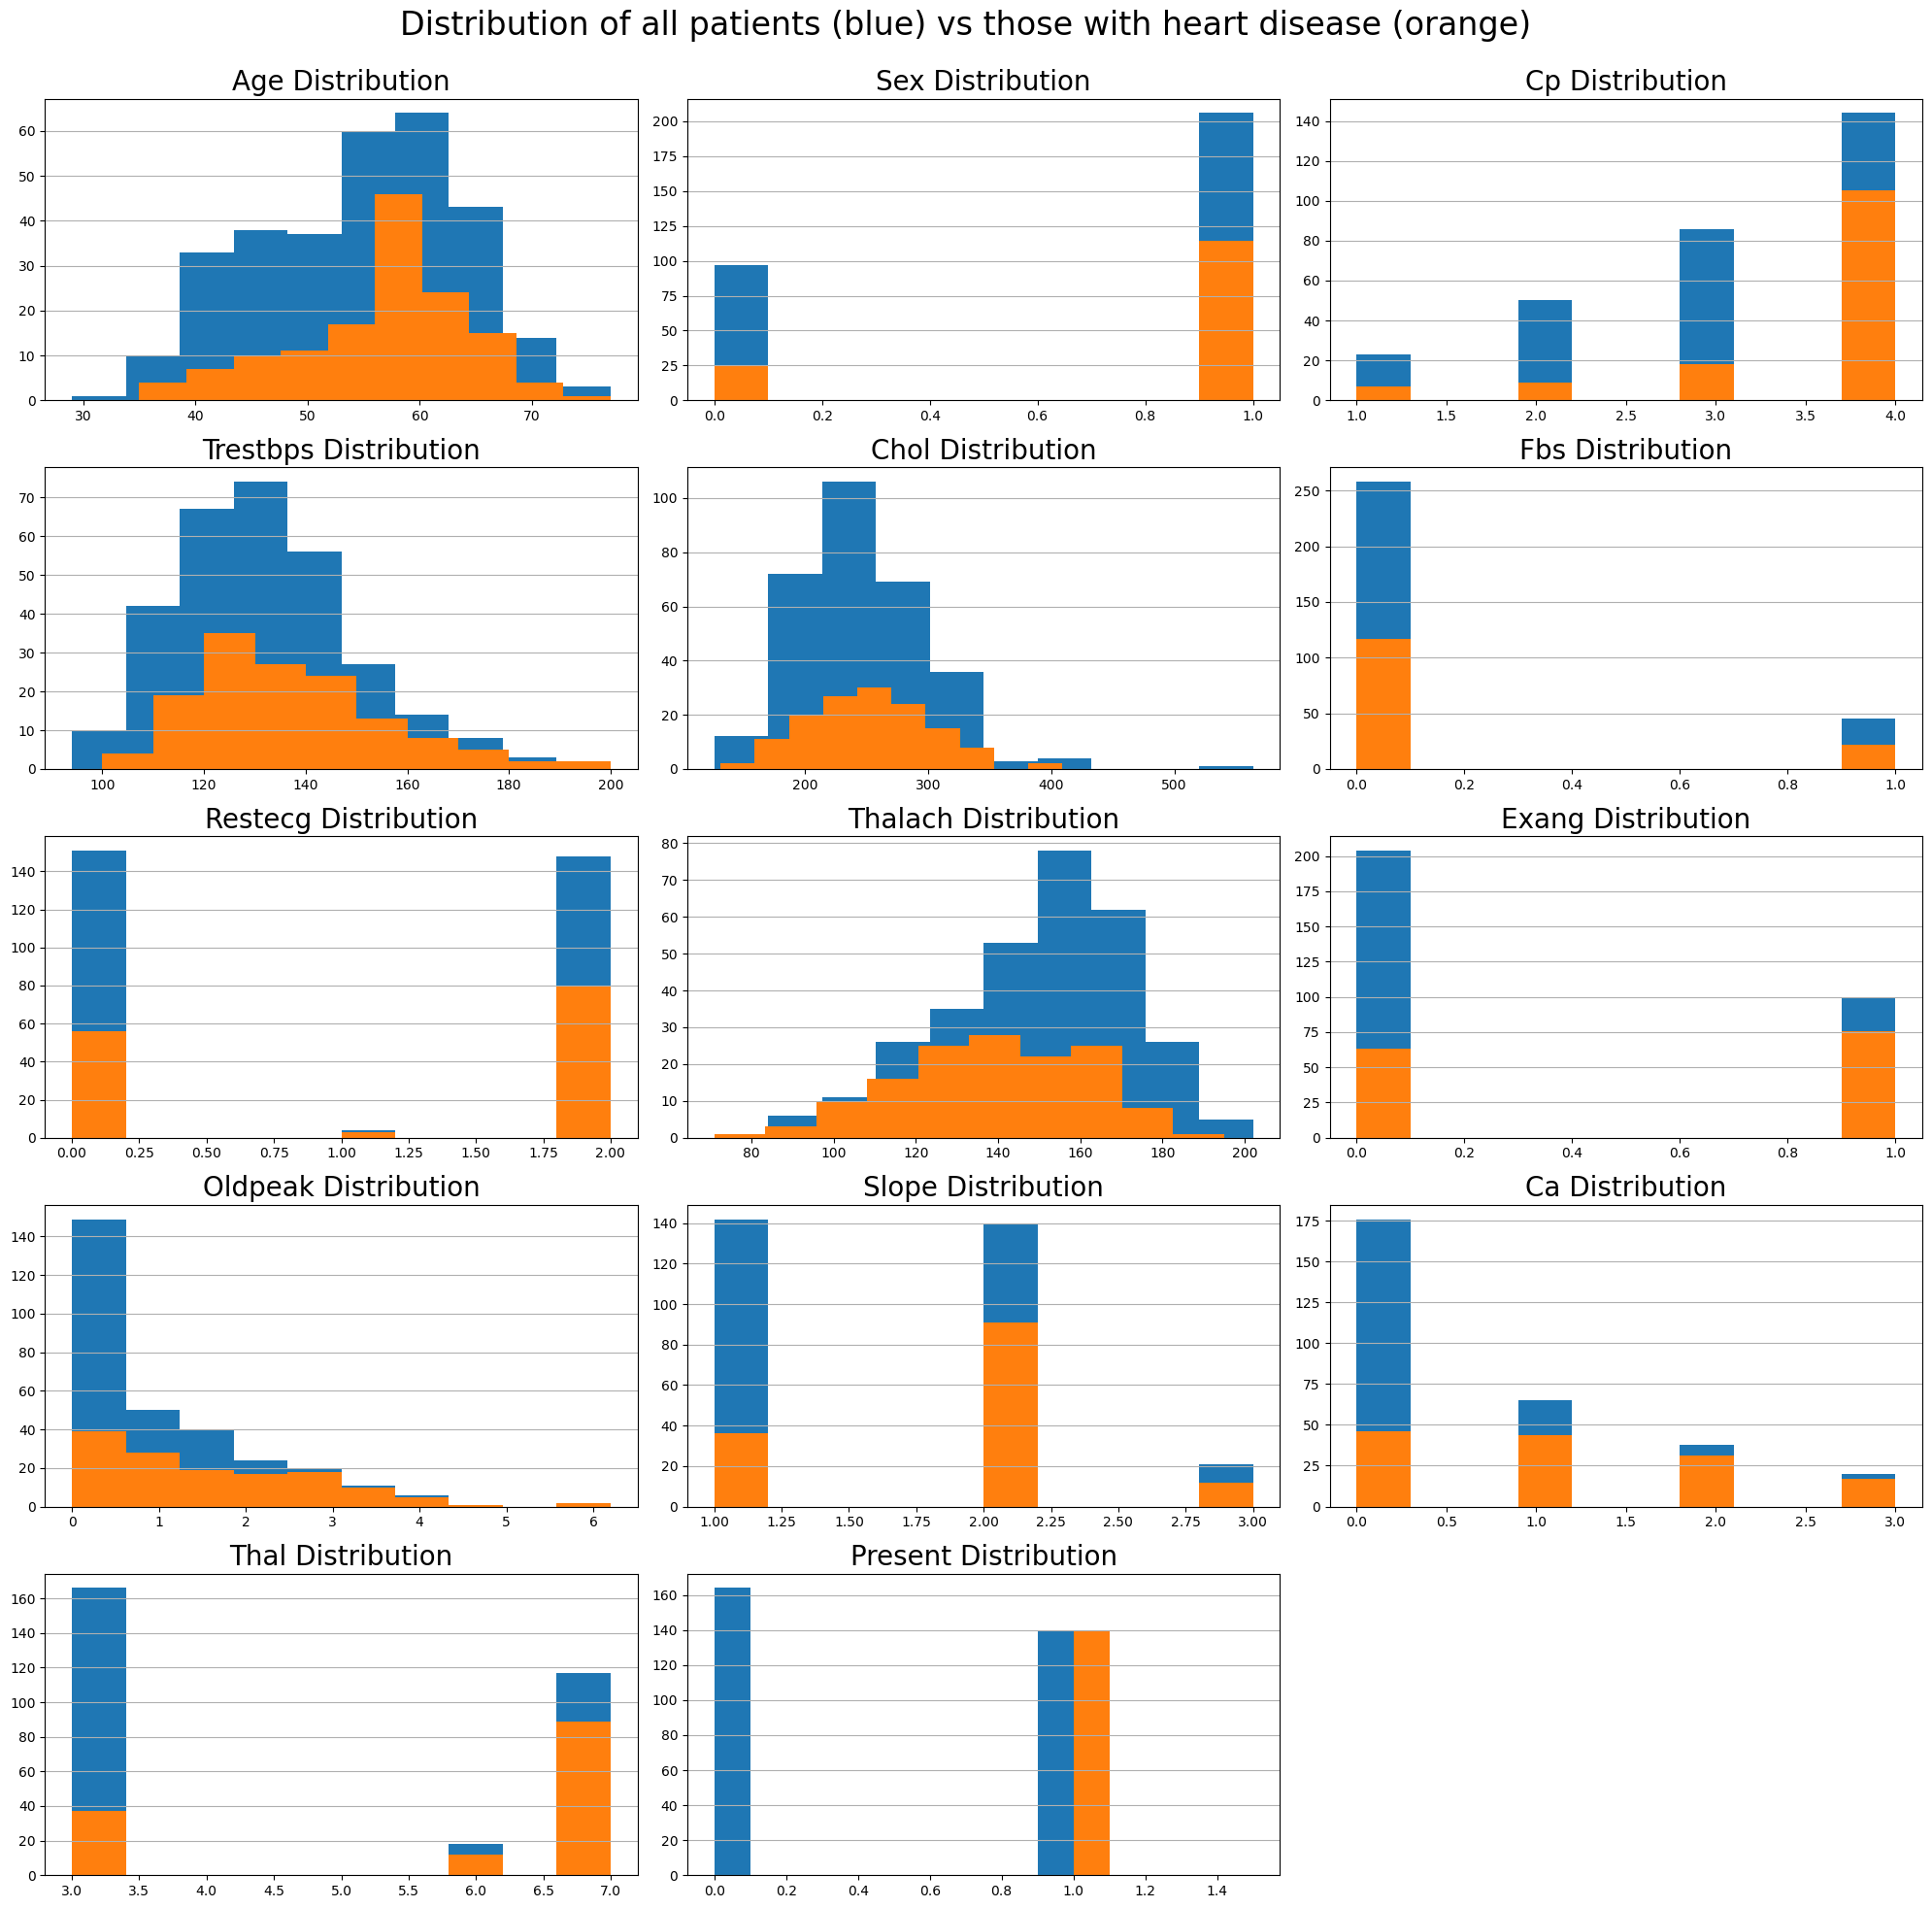

In [34]:
columns = heart_cleaned.select_dtypes(exclude='object').columns

fig = plt.figure(figsize=(20, 20))
fig.subplots_adjust(top=0.8)
for i, column in enumerate(columns):
    ax = fig.add_subplot(5, 3, i+1)

    # plot distribution of all data
    ax.hist(heart_cleaned[column])

    # plot distribution of columns where heart disease is present
    # I should probably use the same bins as the previous plot, but I don't think it makes much difference
    ax.hist(heart_cleaned.loc[heart_cleaned['present'] == 1][column])
    
    ax.set_title(f'{column.title()} Distribution', fontsize=20)
    ax.yaxis.grid(True)
    
fig.suptitle('Distribution of all patients (blue) vs those with heart disease (orange)\n', fontsize=24, y=0.98)
plt.tight_layout()
plt.show()

From this we can see:

Most of our patients are 50 or older, and those with heart disease are a little older - but it's not a massive difference I don't think.
We have twice as many men than women - and a higher proportion of the men have heart disease.
cp (chest pain) is not an even mix. The biggest category is asymptomatic, and it also seems to have the highest proportion of folks with heart disease.
chol is mostly normally distributed, other than a couple of high outliers which will probably muck up the mean vs median.
Most patients have fbs (fasting blood sugar) less than 120mg/dl. But the proportions of heart disease look similar in both groups, so this is unlikely to be a factor.
restecg is not evenly distributed. The middle category, relating to ST-T wave abnormality has has very few members - although pretty much every one in it has heart disease. This could be a good predictor. The other two are more or less even.
thalach (or maximum heart rate achieved) has a median around 160. The distribution is left skewed (meaning more higher values than lower ones).
for exang (exercised induced angina), about twice as many patients don't have it vs those who - but of those who do, a much higher proportion have heart disease. It could be a good predictor.
oldpeak is right-skewed, with a lot of 0 values. I don't really know what this means, but the higher it gets, the more likely the patient will have heart disease. It looks like a good positive predictor to me.
slope distibution is also not even. There are a similar number of patients that are upsloping or flat, but very few downsloping. However, folks who are flat, seem much more likely to have heart disease. Could be a good positive predictor.
ca (number of major vessels) looks like a good predictor. Although less people in the dataset have more vessels, those with more are more likely to have heart disease.
thal is unevenly distributed, but for folks scoring a 6 or 7, seem much more likely to have heart disease than those scoring 3. Could be a good predictor.
present distirbution is almost even. So, there are almost as many patients with heart disease as without. This makes this dataset quite useful.

### Revisiting missing values
Previously, in order to draw the above histograms, I converted the ? marks in the thal and ca columns to Nan. But was this the right thing to do?

I have four options:

Simply not use the columns in our analysis. This is not a good idea since some values in these columns look predictive.
Set all the ? values to the most common value in the rest of the data set. I'd want to understand what these features actually mean before doing that. So, let's not do this either.
Delete the rows of data with the ? value from the data set. This is about 2% of our data which is not a lot of data, so it's not a terrible idea.
Set all the ? values to NaN - which is how things stand at the moment. If our linear regression algorithm will handle empty values in columns, then this seems like the best option. Let's do this - unless we discover it won't handle empty values.

### Checking the correlations
Because quite a lot of our features are categories, and aren't necessarily ordinal, let's create some dummy variables and check against each category for correlation.

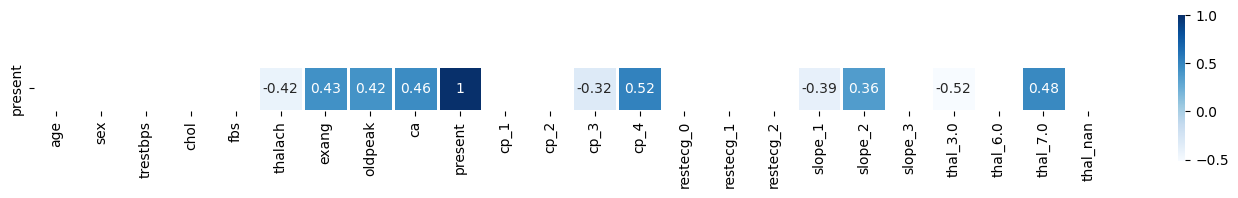

In [37]:
%pip install seaborn
import seaborn as sns
# convert some of the category variables (which are integer at the moment) to string
# so that we can turn them into dummy variables.
heart_dummy = heart_cleaned.copy()
cols_to_convert = ['cp', 'restecg', 'slope', 'thal']

for col in cols_to_convert:
    heart_dummy[col] = heart_dummy[col].map(str)

# now create the dummies - but don't drop the first value; we want to check ALL of them
heart_dummy = pd.get_dummies(heart_dummy)

fig, ax = plt.subplots(figsize=(14,2))
sns.heatmap(
    round(heart_dummy.corr(), 2)[heart_dummy.corr().abs() > 0.3].loc[['present']],
    cmap='Blues',
    annot=True,
    ax=ax,
    linewidth = 1, 
    square =True,
)

plt.tight_layout()
plt.show()

Looking at just the present row, we can see that the strongest correlations for and against heart disease are:

cp_4 and thal_3.0 (+ and -0.52 resp.)
thal_7.0 (0.48)
ca (0.46)
exang (0.43)
thalach and oldpeak (-0.42 and +0.42)
slope_1 (-0.39)
slope_2 (0.36)
cp_3 (-0.32)

In [38]:
# since 'ca' contains four NaN values, and our LogisticRegressor won't work with missing values, we'll need to drop those rows.
heart_dummy = heart_dummy.dropna(subset=['ca'])

predictor_columns = ['cp_4', 'thal_3.0', 'thal_6.0', 'thal_7.0', 'ca', 'exang', 'thalach', 'oldpeak', 'slope_1', 'slope_2', 'cp_3', 'restecg_1']

# Put our features into X
X = heart_dummy[predictor_columns]
# convert the boolean values to 0 and 1
# although it will work with 0's and 1's, they don't work with a scaler - if we need one later
bool_columns = X.select_dtypes(include='bool').columns
X.loc[:, bool_columns] = X[bool_columns].astype(int)

# And the target into y
y = heart_dummy['present']

# Save 25% of the data for testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=12
)

# check that we have cases and non-cases in both sets
print(y_train.value_counts())
print(y_test.value_counts())


0    115
1    109
Name: present, dtype: int64
0    46
1    29
Name: present, dtype: int64


In [39]:
# Fit the model to the training data 
model = LogisticRegression()
model.fit(X_train, y_train)

/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [41]:
# Checking the various metrics for the model

acc= model.score(X_train, y_train)
acc

0.8660714285714286

In [44]:
predictions = model.predict(X_train)
# \text{Sensitivity} = True Positives/True Positives + False Negatives
# Sensitivity - true positive
tp = sum((y_train==1)&(predictions==1))
# Sensitivity - false positive
fn = sum((y_train == 1) & (predictions == 0))
sensitivity = tp/(tp + fn)
sensitivity

0.8165137614678899

In [45]:
# specificity = True Negatives/True Negatives + False Positives
tn = sum((y_train == 0) & (predictions == 0))
fp = sum((y_train == 0) & (predictions == 1))
specificity = tn / (tn + fp)
specificity

0.9130434782608695

Overall the training accuracy was about 76%, the sensitivity was 66%, and the specificity was 86%. Based on these metrics, the model seems to perform better for non-cases.

### Interpreting The Model Coefficients

In [46]:
intercept= model.intercept_
intercept

array([-0.55926343])

In [52]:
coefs = ["age", "thalach", "restecg", "ca"]
# Checking in terms of odds
for coef, val  in zip(coefs, model.coef_[0]):
    print(coef, ":", round(np.exp(val), 2))

age : 2.96
thalach : 0.39
restecg : 0.69
ca : 1.92


In [53]:
coefs = pd.DataFrame(model.coef_[0], index=predictor_columns, columns=['Log Odds (unscaled)'])#.sort_values(by='Log Odds (unscaled)', ascending=False)
coefs['Odds Ratio (unscaled)'] = np.exp(coefs['Log Odds (unscaled)'])
coefs.sort_values(by='Log Odds (unscaled)', ascending=False)

,Log Odds (unscaled),Odds Ratio (unscaled)
ca,1.165566,3.207738
cp_4,1.086528,2.963966
slope_2,0.722202,2.058961
thal_7.0,0.652158,1.919680
exang,0.639654,1.895824
oldpeak,0.489200,1.631012
thalach,-0.008758,0.991281
restecg_1,-0.143746,0.866108
slope_1,-0.195250,0.822629
thal_6.0,-0.376240,0.686438


According to the above results, factors that would indicate prevalence of heart disease are:

ca (artery count)
cp_4 (asymptomatic chest pain)
thal_7.0 (a certain heart rate reading, related to "reversable heart defect")
slope_2 (some slope shape in a heart related graph... go ask a doctor about this!)
exang (exercise induced angina)
oldpeak (something related to rest after exercise)
These match our correlations from before (that we used to select these predictors) fairly well. It's possible that we should have scaled our data before running the model (since our boolean features range from 0 to 1, whereas exang goes up to 100+). So let's try scaling, and see if anything significant changes.

In [56]:
from sklearn.preprocessing import StandardScaler
# Fit and transform the X_train data
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

# do everything we did before again - but on the scaled data
# Fit the model to the scaled training data 
model_scaled = LogisticRegression(max_iter=200).fit(X_train_scaled, y_train)

# see how well it predicts against the training data
y_pred_scaled = model_scaled.predict(X_train_scaled)

# shows some stats from the model predictions
def show_pred_stats(y_pred, y_train):
    num_predictions = len(y_pred)
    correct_predictions = sum(y_pred == y_train)

    tp = sum((y_pred == 1) & (y_train == 1))
    fp = sum((y_pred == 1) & (y_train == 0))
    tn = sum((y_pred == 0) & (y_train == 0))
    fn = sum((y_pred == 0) & (y_train == 1))
    acc = correct_predictions / num_predictions
    sens = tp / (tp + fn)
    spec = tn / (tn + fp)

    print(f"Training Accuracy: {(acc * 100):.2f}%")
    print(f"Training Sensitivity: {(sens * 100):.2f}%", )
    print(f"Training Specificity:  {(spec * 100):.2f}%")

show_pred_stats(y_pred_scaled, y_train)

Training Accuracy: 86.16%
Training Sensitivity: 81.65%
Training Specificity:  90.43%


In [57]:
coefs['Odds Ratio (scaled)'] = np.exp(model_scaled.coef_[0])

# show the coefs, still sorted by the _unscaled_ odds ratio
coefs[['Odds Ratio (unscaled)', 'Odds Ratio (scaled)']].sort_values(by='Odds Ratio (unscaled)', ascending=False)

,Odds Ratio (unscaled),Odds Ratio (scaled)
ca,3.207738,3.250258
cp_4,2.963966,1.865879
slope_2,2.058961,1.681870
thal_7.0,1.919680,1.371681
exang,1.895824,1.394205
oldpeak,1.631012,1.898446
thalach,0.991281,0.921070
restecg_1,0.866108,0.926183
slope_1,0.822629,0.987364
thal_6.0,0.686438,0.881873


In [58]:
# For unscaled data
y_pred = model.predict(X_test)

print('For unscaled test data')
show_pred_stats(y_pred, y_test)

# For scaled data
X_test_scaled = scaler.transform(X_test)

# see how well it predicts against the training data
y_pred_scaled = model_scaled.predict(X_test_scaled)

print('\nFor scaled test data')
show_pred_stats(y_pred_scaled, y_test)

For unscaled test data
Training Accuracy: 88.00%
Training Sensitivity: 82.76%
Training Specificity:  91.30%

For scaled test data
Training Accuracy: 86.67%
Training Sensitivity: 79.31%
Training Specificity:  91.30%


By comparison here are the previous results from the training data:

Reading	For Unscaled Data	For Scaled Data
Training Accuracy	86.61%	86.16%
Training Sensitivity	81.65%	81.65%
Training Specificity	91.30%	90.43%
And here are the test results:

Reading	For Unscaled Data	For Scaled Data
Test Accuracy	85.33%	86.67%
Test Sensitivity	75.86%	79.31%
Test Specificity	91.3%	91.30%
From the bottom table, we can see that the scaled features performed slightly better on the test data, but both got more or less the same results as the training data - which is surprising. It is good to see there is still a high specificity (meaning less false negatives).

While my model seems to be pretty accurate (although I'm not sure how accurate it needs to be for medical use), it also uses a lot of detailed predictors! By the time a doctor has done all these tests for a patient, they will probably already have an 87% accurate impression of whether someone has heart disease or not. So, I don't think this model is actually that useful for practical purposes.

If I knew what tests were cheap and easy to do (in addition to age and sex), then we could build a model around those, and if, say, that model had a sensitivity score higher than 50%, we could call a patient in and have them do all the tests. Or something like that... Just to finish, I'm going to guess some cheap and easy predictors and try that approach: